In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
import os
import cv2
import numpy as np
from imp import reload

from hangul.read_data import load_data
from hangul.label_mapping import imf2idx, idx2imf
from hangul import variables
from hangul.variables import label_df
from hangul import style

In [2]:
fname = os.path.join(os.environ['HOME'], 'data/hangul/h5s/NanumGothic/NanumGothic_500.h5')

In [7]:
variables.label_df[['initial',
 'medial',
 'final',
 'initial_geometry',
 'medial_geometry',
 'final_geometry',
 'all_geometry',
 'atom_bof',
 'atom_mod_rotations_bof']]

,initial,medial,final,initial_geometry,medial_geometry,final_geometry,all_geometry,atom_bof,atom_mod_rotations_bof
0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
1,0,0,1,0,0,1,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
2,0,0,2,0,0,2,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
3,0,0,3,0,0,2,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
4,0,0,4,0,0,1,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
5,0,0,5,0,0,2,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
6,0,0,6,0,0,2,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
7,0,0,7,0,0,1,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
8,0,0,8,0,0,1,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
9,0,0,9,0,0,2,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"


In [4]:
HOME = os.environ['HOME']
imgs, labels, init, med, fin = load_data(fname, median_shape=True)
#fin = np.concatenate([np.zeros((1,) + fin.shape[1:]), fin])
w, h = imgs.shape[1:]

In [5]:
atoms = variables.atoms
atoms_mod_rotations = variables.atoms_mod_rotations
imf = np.concatenate((init, med, fin), axis=0)
imfs = [init, med, fin]

atom_imgs = []
for atom in atoms:
    imf_idx = np.argmax(atom)
    imf_value = atom[imf_idx]
    atom_imgs.append(imfs[imf_idx][imf_value])
atom_imgs = np.stack(atom_imgs, axis=0)

atom_mod_rotations_imgs = []
for atom in atoms_mod_rotations:
    imf_idx = np.argmax(atom)
    imf_value = atom[imf_idx]
    atom_mod_rotations_imgs.append(imfs[imf_idx][imf_value])
atom_mod_rotations_imgs = np.stack(atom_mod_rotations_imgs, axis=0)


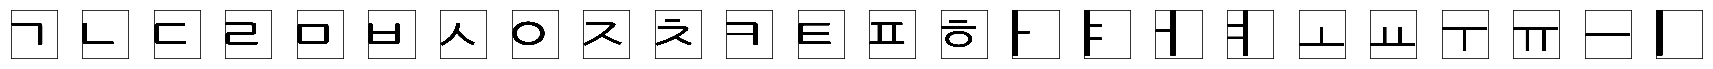

In [6]:
f, axes = plt.subplots(1, len(atoms), figsize=(len(atoms), 1))
for ii, atom in enumerate(atom_imgs):
    ax = axes[ii]
    ax.imshow(atom, cmap='gray_r')
    ax.set_xticks([])
    ax.set_yticks([])
f.tight_layout()
plt.savefig(os.path.join(HOME, 'results/hangul/atoms.pdf'), dpi=300)

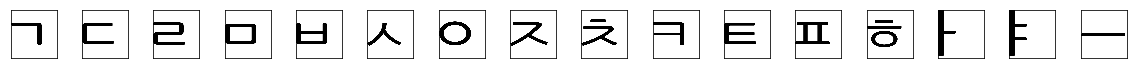

In [7]:
f, axes = plt.subplots(1, len(atoms_mod_rotations), figsize=(len(atoms_mod_rotations), 1))
for ii, atom in enumerate(atom_mod_rotations_imgs):
    ax = axes[ii]
    ax.imshow(atom, cmap='gray_r')
    #ax.set_ylabel(ii)
    ax.set_xticks([])
    ax.set_yticks([])
f.tight_layout()
plt.savefig(os.path.join(HOME, 'results/hangul/atoms_mod_rotations.pdf'), dpi=300)

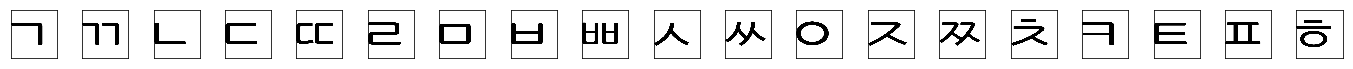

In [8]:
f, axes = plt.subplots(1, len(init), figsize=(len(init), 1))
for ii in range(len(init)):
    ax = axes[ii]
    ax.imshow(init[ii], cmap='gray_r')
    ax.set_xticks([])
    ax.set_yticks([])
f.tight_layout()
plt.savefig(os.path.join(HOME, 'results/hangul/initial.pdf'), dpi=300)

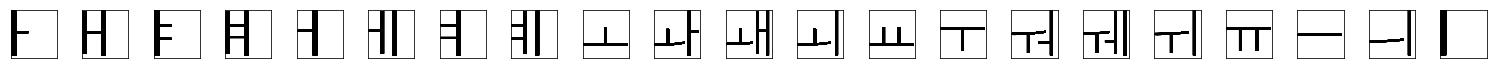

In [9]:
f, axes = plt.subplots(1, len(med), figsize=(len(med), 1))
for ii in range(len(med)):
    ax = axes[ii]
    ax.imshow(med[ii], cmap='gray_r')
    ax.set_xticks([])
    ax.set_yticks([])
f.tight_layout()
plt.savefig(os.path.join(HOME, 'results/hangul/medial.pdf'), dpi=300)

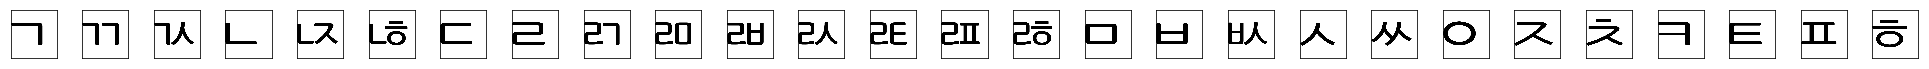

In [10]:
f, axes = plt.subplots(1, len(fin), figsize=(len(fin), 1))
for ii in range(len(fin)):
    ax = axes[ii]
    ax.imshow(fin[ii], cmap='gray_r')
    ax.set_xticks([])
    ax.set_yticks([])
f.tight_layout()
plt.savefig(os.path.join(HOME, 'results/hangul/fin.pdf'), dpi=300)

[[ 0 -1]
 [ 8 -1]
 [ 7 -1]
 [ 4  4]]

[[-1 13 -1]
 [13 13 -1]
 [14 -1 -1]
 [-1 14 15]]

[[-1 -1]
 [-1 -1]
 [ 2 -1]
 [ 0 12]]


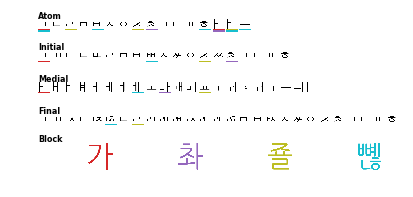

In [22]:
colors = ['C3', 'C4', 'C8', 'C9']
fontsize=style.axis_label_fontsize

scale = 1.
figsize = (scale*5, scale*2.25)
f = plt.figure(figsize=figsize)
width = .031
height = width * figsize[0] * h / w / figsize[1]
dx = 1.2 * width
axes = []

ys = np.linspace(.01, .89, 10)
x = .001
ar_y = ys[9]

#a_x = .04
#a_y = ys[10]

i_y = ys[7]

m_y = ys[5]

f_y = ys[3]

b_y = ys[0]

b_idxs = [0, imf2idx(14, 9, 0), imf2idx(12, 12, 8), imf2idx(8, 7, 6)]
initial_vars = np.array([[label_df[('initial_atom', ii)].loc[idx] for ii in range(2)] for idx in b_idxs])
medial_vars = np.array([[label_df[('medial_atom', ii)].loc[idx] for ii in range(3)] for idx in b_idxs])
final_vars = np.array([[label_df[('final_atom', ii)].loc[idx] for ii in range(2)] for idx in b_idxs])
initial_vars_mod_rotations = np.array([[label_df[('initial_atom_mod_rotations', ii)].loc[idx] for ii in range(2)] for idx in b_idxs])
medial_vars_mod_rotations = np.array([[label_df[('medial_atom_mod_rotations', ii)].loc[idx] for ii in range(3)] for idx in b_idxs])
final_vars_mod_rotations = np.array([[label_df[('final_atom_mod_rotations', ii)].loc[idx] for ii in range(2)] for idx in b_idxs])

dx2 = 1. / (2 * len(b_idxs))
height2 = height * 3
width2 = width * 3

ax = f.add_axes([0, 0, 1, 1])
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.patch.set_alpha(0)
ax.axis('off')

dy = .0075

print(initial_vars_mod_rotations - 1)
print()
print(medial_vars_mod_rotations - 1)
print()
print(final_vars_mod_rotations - 1)
count = np.zeros(atoms_mod_rotations.shape[0], dtype=int)
for ii, atom in enumerate(atoms_mod_rotations):
    ax = f.add_axes([x + ii * dx, ar_y, width, height])
    ax.imshow(atom_mod_rotations_imgs[ii], cmap='gray_r')
    for jj, idxs in enumerate(initial_vars_mod_rotations):
        idxs = idxs - 1
        if ii in idxs[idxs >= 0]:
            axt = f.add_axes([x + ii * dx, ar_y - (count[ii]+1) * dy*1.25, width, dy])
            count[ii] += 1
            bar = np.zeros((1, 2 * w, 4))
            bar[..., 3] = 1.
            bar[..., :3] = to_rgb(colors[jj])
            axt.imshow(bar, aspect='auto')
            axt.axis('off')
    for jj, idxs in enumerate(medial_vars_mod_rotations):
        idxs = idxs - 1
        if ii in idxs[idxs >= 0]:
            axt = f.add_axes([x + ii * dx, ar_y - (count[ii]+1) * dy*1.25, width, dy])
            count[ii] += 1
            bar = np.zeros((1, 2 * w, 4))
            bar[..., 3] = 1.
            bar[..., :3] = to_rgb(colors[jj])
            axt.imshow(bar, aspect='auto')
            axt.axis('off')
    for jj, idxs in enumerate(final_vars_mod_rotations):
        idxs = idxs - 1
        if ii in idxs[idxs >= 0]:
            axt = f.add_axes([x + ii * dx, ar_y - (count[ii]+1) * dy*1.25, width, dy])
            count[ii] += 1
            bar = np.zeros((1, 2 * w, 4))
            bar[..., 3] = 1.
            bar[..., :3] = to_rgb(colors[jj])
            axt.imshow(bar, aspect='auto')
            axt.axis('off')
    axes.append(ax)

"""
for ii, atom in enumerate(atoms):
    ax = f.add_axes([a_x + ii * dx, a_y, width, height])
    idx = atom.argmax()
    ax.imshow(atom_imgs[ii], cmap='gray_r')
    for jj, idxs in enumerate(initial_vars):
        idxs = idxs - 1
        if ii in idxs[idxs >= 0]:
            ax.scatter([jj * w / 3.], [0], marker='o', c=colors[jj])
    for jj, idxs in enumerate(medial_vars):
        idxs = idxs - 1
        if ii in idxs[idxs >= 0]:
            ax.scatter([jj * w / 3.], [0], marker='o', c=colors[jj])
    for jj, idxs in enumerate(final_vars):
        idxs = idxs - 1
        if ii in idxs[idxs >= 0]:
            ax.scatter([jj * w / 3.], [0], marker='o', c=colors[jj])
    axes.append(ax)
"""

count = np.zeros(init.shape[0], dtype=int)
for ii in range(len(init)):
    ax = f.add_axes([x + ii * dx, i_y, width, height])
    ax.imshow(init[ii], cmap='gray_r')
    for jj, bi in enumerate(b_idxs):
        if idx2imf(bi)[0] == ii:
            axt = f.add_axes([x + ii * dx, i_y - (count[ii]+1) * dy*1.25, width, dy])
            count[ii] += 1
            bar = np.zeros((1, 2 * w, 4))
            bar[..., 3] = 1.
            bar[..., :3] = to_rgb(colors[jj])
            axt.imshow(bar, aspect='auto')
            axt.axis('off')
    axes.append(ax)

count = np.zeros(med.shape[0], dtype=int)
for ii in range(len(med)):
    ax = f.add_axes([x + ii * dx, m_y, width, height])
    ax.imshow(med[ii], cmap='gray_r')
    for jj, bi in enumerate(b_idxs):
        if idx2imf(bi)[1] == ii:
            axt = f.add_axes([x + ii * dx, m_y - (count[ii]+1) * dy*1.25, width, dy])
            count[ii] += 1
            bar = np.zeros((1, 2 * w, 4))
            bar[..., 3] = 1.
            bar[..., :3] = to_rgb(colors[jj])
            axt.imshow(bar, aspect='auto')
            axt.axis('off')
    axes.append(ax)

count = np.zeros(med.shape[0], dtype=int)
for ii in range(len(fin)):
    ax = f.add_axes([x + ii * dx, f_y, width, height])
    ax.imshow(fin[ii], cmap='gray_r')
    for jj, bi in enumerate(b_idxs):
        fi = idx2imf(bi)[2] - 1
        if fi == ii:
            axt = f.add_axes([x + ii * dx, f_y - (count[ii]+1) * dy*1.25, width, dy])
            count[ii] += 1
            bar = np.zeros((1, 2 * w, 4))
            bar[..., 3] = 1.
            bar[..., :3] = to_rgb(colors[jj])
            axt.imshow(bar, aspect='auto')
            axt.axis('off')
    axes.append(ax)

for ii, idx in enumerate(b_idxs):
    ax = f.add_axes([(2 * ii + 1) * dx2, b_y, width2, height2])
    im = np.zeros(imgs.shape[1:] + (4,))
    im[:, :, 3] = imgs[idx, :, :] / 255.
    im[:, :, :3] = np.array(to_rgb(colors[ii]))[np.newaxis, np.newaxis]
    ax.imshow(im)
    axes.append(ax)

f.text(x, ar_y + height - dy, 'Atom', ha='left', va='bottom', fontsize=fontsize, weight='demibold')
#f.text(a_x - width / 2, a_y + height / 2, 'Atoms', ha='right', va='center', fontsize=fontsize, rotation=90)
f.text(x, i_y + height - dy, 'Initial', ha='left', va='bottom', fontsize=fontsize, weight='demibold')
f.text(x, m_y + height - dy, 'Medial', ha='left', va='bottom', fontsize=fontsize, weight='demibold')
f.text(x, f_y + height - dy, 'Final', ha='left', va='bottom', fontsize=fontsize, weight='demibold')
f.text(x, b_y + height2 - dy, 'Block', ha='left', va='bottom', fontsize=fontsize, weight='demibold')

for ax in axes:
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.axis('off')
plt.savefig('/home/jesse/Downloads/hangul_composition.pdf', dpi=300)
plt.savefig('/home/jesse/Downloads/hangul_composition.png', dpi=300)

In [161]:
max(label_df[('initial_atom_mod_rotations', 0)]), max(label_df[('initial_atom_mod_rotations', 1)])

(13, 8)

In [160]:
atom_mod_rotations_imgs.shape

(16, 489, 465)

In [146]:
variables.atoms_mod_rotations.max()

18

In [147]:
variables.atom_correspondence.shape

(24,)

In [151]:
atoms_mod_rotations.shape

(16, 3)

In [153]:
variables.atoms_mod_rotations.shape

(16, 3)

In [11]:
def add_arrow2(ax, start, start_idx, end, end_idx, c):
    if start == 'a':
        x0 = a_x + width
        y0 = a_y + height / 2 - start_idx * dy
    elif start == 'i':
        x0 = i_x + width
        y0 = i_y + height / 2 - start_idx * dy
    elif start == 'm':
        x0 = m_x + width
        y0 = m_y + height / 2 - start_idx * dy
    elif start == 'f':
        x0 = f_x + width
        y0 = f_y + height / 2 - start_idx * dy
    else:
        raise ValueError
    if end == 'i':
        x1 = i_x
        y1 = i_y + height / 2 - end_idx * dy
    elif end == 'm':
        x1 = m_x
        y1 = m_y + height / 2 - end_idx * dy
    elif end == 'f':
        x1 = f_x
        y1 = f_y + height / 2 - end_idx * dy
    elif end == 'b':
        x1 = b_x
        y1 = b_y + height2 - (2 * end_idx + 1) * dy2
    else:
        raise ValueError
    ax.quiver([x0], [y0], [x1-x0], [y1-y0], color=c,
              pivot='tail', angles='xy', scale=1, scale_units='xy')
    return

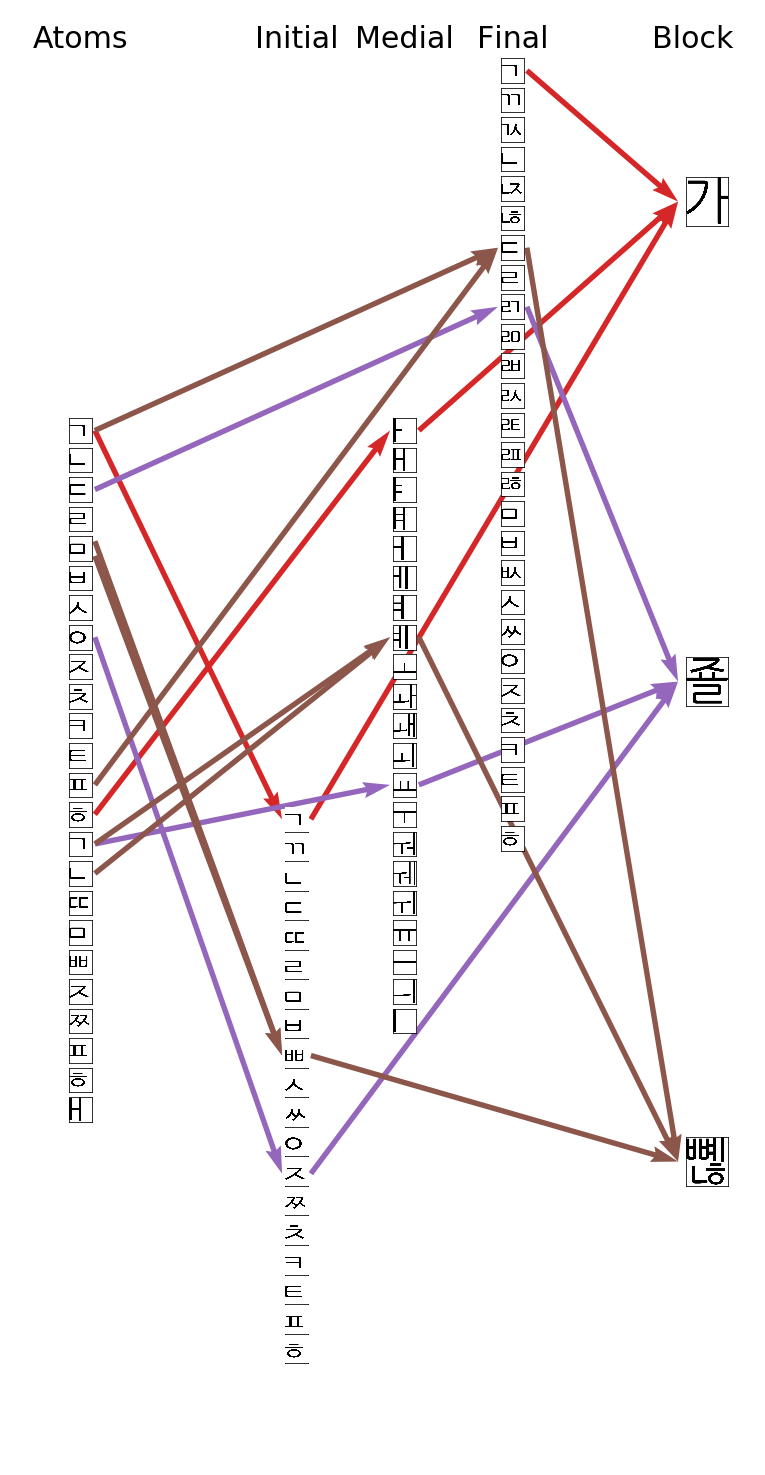

In [17]:
colors = ['C3', 'C4', 'C5']

figsize = (10, 20)
f = plt.figure(figsize=figsize)
width = .04
height = width * figsize[0] * h / w / figsize[1]
dy = 1.2 * height
axes = []

a_x = .05
a_y = .7

i_x = .35
i_y = .43

m_x = .5
m_y = .7

f_x = .65
f_y = .95

b_x = .9
b_y = 1.
b_idxs = [0, imf2idx(12, 12, 8), imf2idx(8, 7, 6)]
dy2 = 1. / (2 * len(b_idxs))
height2 = height * 2
width2 = width * 2

ax = f.add_axes([0, 0, 1, 1])
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.patch.set_alpha(0)
ax.axis('off')
add_arrow2(ax, 'a', 0, 'i', 0, c=colors[0])
add_arrow2(ax, 'i', 0, 'b', 0, c=colors[0])
add_arrow2(ax, 'a', 13, 'm', 0, c=colors[0])
add_arrow2(ax, 'm', 0, 'b', 0, c=colors[0])
add_arrow2(ax, 'f', 0, 'b', 0, c=colors[0])

add_arrow2(ax, 'a', 7, 'i', 12, c=colors[1])
add_arrow2(ax, 'i', 12, 'b', 1, c=colors[1])
add_arrow2(ax, 'a', 14, 'm', 12, c=colors[1])
add_arrow2(ax, 'm', 12, 'b', 1, c=colors[1])
add_arrow2(ax, 'a', 2, 'f', 8, c=colors[1])
add_arrow2(ax, 'f', 8, 'b', 1, c=colors[1])

add_arrow2(ax, 'a', 4-1/4, 'i', 8, c=colors[2])
add_arrow2(ax, 'a', 4+1/4, 'i', 8, c=colors[2])
add_arrow2(ax, 'a', 14, 'm', 7, c=colors[2])
add_arrow2(ax, 'a', 15, 'm', 7, c=colors[2])
add_arrow2(ax, 'a', 0, 'f', 6, c=colors[2])
add_arrow2(ax, 'a', 12, 'f', 6, c=colors[2])
add_arrow2(ax, 'i', 8, 'b', 2, c=colors[2])
add_arrow2(ax, 'm', 7, 'b', 2, c=colors[2])
add_arrow2(ax, 'f', 6, 'b', 2, c=colors[2])


for ii, atom in enumerate(atoms):
    ax = f.add_axes([a_x, a_y - ii * dy, width, height])
    idx = atom.argmax()
    ax.imshow(imf[atom[idx]], cmap='gray_r')
    axes.append(ax)

for ii in range(len(init)):
    ax = f.add_axes([i_x, i_y - ii * dy, width, height])
    ax.imshow(init[ii], cmap='gray_r', zorder=100)
    axes.append(ax)

for ii in range(len(med)):
    ax = f.add_axes([m_x, m_y - ii * dy, width, height])
    ax.imshow(med[ii], cmap='gray_r')
    axes.append(ax)

for ii in range(len(fin)):
    ax = f.add_axes([f_x, f_y - ii * dy, width, height])
    ax.imshow(fin[ii], cmap='gray_r')
    axes.append(ax)

for ii, idx in enumerate(b_idxs):
    ax = f.add_axes([b_x, b_y - (2 * ii + 1) * dy2 + height2 / 2,
                     width2, height2])
    ax.imshow(imgs[idx], cmap='gray_r')
    axes.append(ax)

f.text(a_x + width / 2, .98, 'Atoms', ha='center', va='center', fontsize=30)
f.text(i_x + width / 2, .98, 'Initial', ha='center', va='center', fontsize=30)
f.text(m_x + width / 2, .98, 'Medial', ha='center', va='center', fontsize=30)
f.text(f_x + width / 2, .98, 'Final', ha='center', va='center', fontsize=30)
f.text(b_x + width / 2, .98, 'Block', ha='center', va='center', fontsize=30)

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
plt.savefig(os.path.join('/home/jesse/Downloads/compose_hangul.pdf'),
            dpi=300)

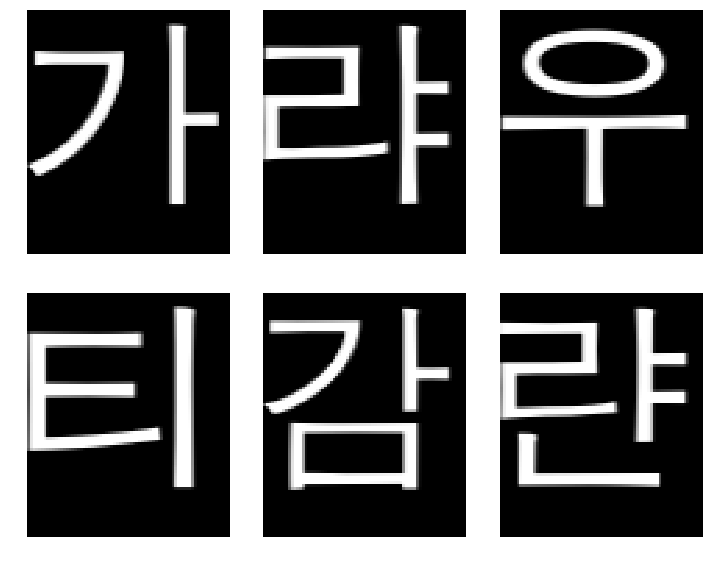

In [44]:
indices = [0, 2996, 6832, 9968, 16, 3000 ]

fig, axes = plt.subplots(2,3, figsize=(10,8))
axes = axes.flatten()

for i in range(6):
    axes[i].imshow(image[indices[i]], cmap = 'gray')
    axes[i].axis('off')
plt.tight_layout()
plt.savefig(os.path.join(os.environ['HOME'], 'data/hangul/results/plots/rotation.pdf'), dpi=300)
plt.show()

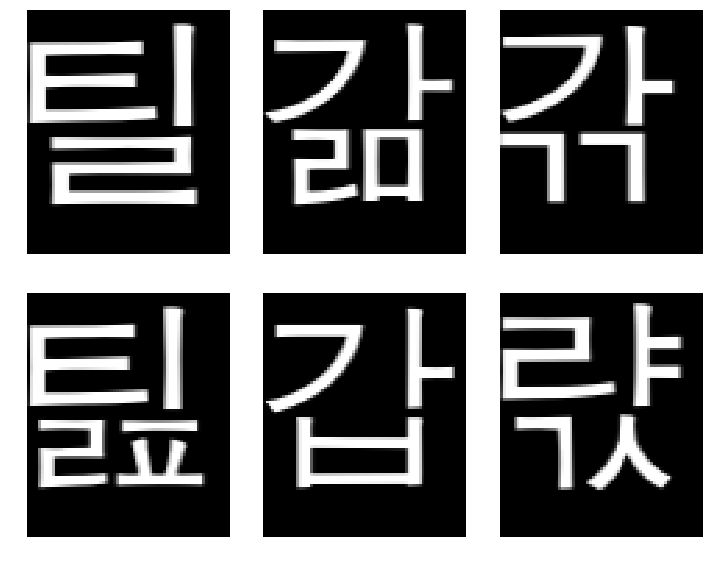

In [49]:
indices2 = [9976,10,2,9982,17,2999]
fig, axes = plt.subplots(2,3, figsize=(10,8))
axes = axes.flatten()
for i in range(6):
    axes[i].imshow(image[indices2[i]], cmap = 'gray')
    axes[i].axis('off')
plt.tight_layout()
plt.savefig(os.path.join(os.environ['HOME'], 'data/hangul/results/plots/rotation.pdf'), dpi=300)
plt.show()

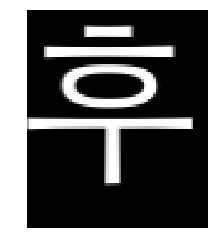

In [89]:
plt.imshow(image[10948], cmap = 'gray')
plt.axis('off')
plt.savefig(os.path.join(os.environ['HOME'], 'data/hangul/results/plots/1.pdf'))

plt.show()

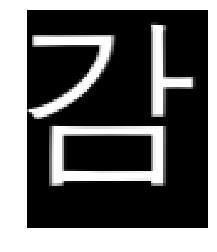

In [90]:
plt.imshow(image[16], cmap = 'gray')
plt.axis('off')
plt.savefig(os.path.join(os.environ['HOME'], 'data/hangul/results/plots/2.pdf'))

plt.show()

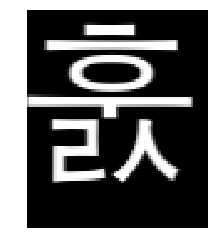

In [91]:
plt.imshow(image[10960], cmap = 'gray')
plt.axis('off')
plt.savefig(os.path.join(os.environ['HOME'], 'data/hangul/results/plots/3.pdf'))
plt.show()

In [75]:
from hangul.label_mapping import imf2int, int2imf, hex2imf
imf2int(1,1,16)

44664

In [64]:
int2imf(55008)

(18, 14, 0)